# Objective

* To identify which variable have more impact on price of camera

* To build the Model which will help to Predict the Price of camera based on Various parameter ( independent Variable ) 

In [358]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings("ignore")

In [359]:
df = pd.read_csv(r"C:\Users\nikhi\Downloads\Cellphone.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 161 entries, 0 to 160
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Price            161 non-null    int64  
 1   Sale             161 non-null    int64  
 2   weight           161 non-null    float64
 3   resolution       161 non-null    float64
 4   ppi              161 non-null    int64  
 5   cpu core         161 non-null    int64  
 6   cpu freq         161 non-null    float64
 7   internal memory  161 non-null    float64
 8   ram              161 non-null    float64
 9   Rear_Cam         161 non-null    float64
 10  Front_Cam        161 non-null    float64
 11  battery          161 non-null    int64  
 12  thickness        161 non-null    float64
dtypes: float64(8), int64(5)
memory usage: 16.5 KB


In [360]:
df.head()

,Price,Sale,weight,resolution,ppi,cpu core,cpu freq,internal memory,ram,Rear_Cam,Front_Cam,battery,thickness
0,2357,10,135.0,5.2,424,8,1.35,16.0,3.000,13.00,8.0,2610,7.4
1,1749,10,125.0,4.0,233,2,1.30,4.0,1.000,3.15,0.0,1700,9.9
2,1916,10,110.0,4.7,312,4,1.20,8.0,1.500,13.00,5.0,2000,7.6
3,1315,11,118.5,4.0,233,2,1.30,4.0,0.512,3.15,0.0,1400,11.0
4,1749,11,125.0,4.0,233,2,1.30,4.0,1.000,3.15,0.0,1700,9.9


# EDA






# Missing Values

In [361]:
df.isna().sum()

Price              0
Sale               0
weight             0
resolution         0
ppi                0
cpu core           0
cpu freq           0
internal memory    0
ram                0
Rear_Cam           0
Front_Cam          0
battery            0
thickness          0
dtype: int64

# Outlier

<Axes: >

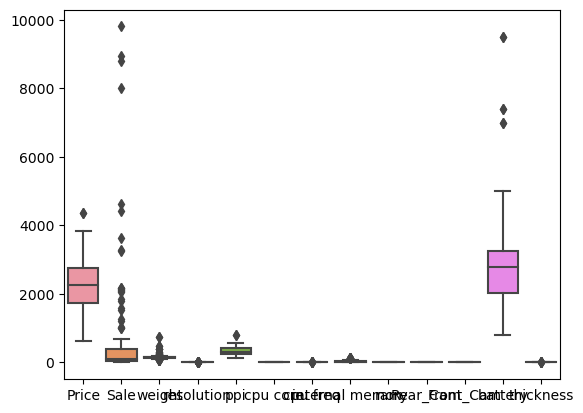

In [362]:
import seaborn as sns
sns.boxplot(data=df)

# Treatment of Outlier -- Winsorizing Technique

In [363]:
for i in df:                  # i = column name 
    if df[i].dtypes in ("float64","int64"): # df[i] = every column will select float & int column only
        q1 = df[i].quantile(0.25)  # for 1 column compute q1
        q3 = df[i].quantile(0.75)  # for 1 column compute q3
        iqr = q3-q1  # for 1 column compute IQR
        ul = q3 + 1.5*iqr # for 1 column compute UPPER LIMIT
        ll = q1 - 1.5*iqr # for 1 column compute LOWER LIMIT 
        df[i].clip(lower=ll,upper=ul,inplace=True)

<Axes: >

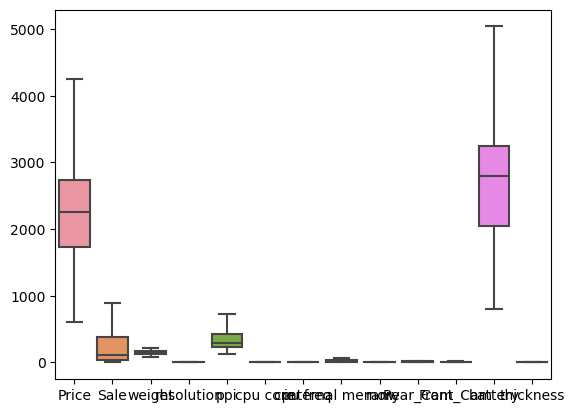

In [364]:
import seaborn as sns
sns.boxplot(data=df)

# Data Partition

In [365]:
X = df.drop('Price', axis= 1)
y = df[['Price']]

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.7 ,random_state=134)

In [366]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler() 
cols_to_n = ['Price', 'weight', 'resolution', 'ppi', 'cpu core', 'cpu freq', 'internal memory', 'ram', 'Rear_Cam', 'Front_Cam', 'battery', 'thickness']
df[cols_to_n] = sc.fit_transform(df[cols_to_n])

In [367]:
train = pd.concat([y_train, X_train], axis=1)
train.head()

,Price,Sale,weight,resolution,ppi,cpu core,cpu freq,internal memory,ram,Rear_Cam,Front_Cam,battery,thickness
132,2466,567.0,154.0,5.5,534.0,4,2.7,32.0,3.000,13.00,2.1,3000,9.1
142,2508,899.5,152.0,5.2,424.0,4,2.5,16.0,3.000,20.70,2.2,3100,7.3
143,2508,899.5,152.0,5.2,424.0,4,2.5,16.0,3.000,20.70,2.2,3100,7.3
117,3287,367.0,170.0,5.5,401.0,8,2.0,32.0,4.000,12.00,13.0,5000,8.0
8,1315,14.0,118.5,4.0,233.0,2,1.3,4.0,0.512,3.15,0.0,1400,11.0


# Correlation

In [368]:
Correlation = train.corr()
Correlation.style.applymap(lambda x: 'background-color : cyan' if x > 0.7 else '')

,Price,Sale,weight,resolution,ppi,cpu core,cpu freq,internal memory,ram,Rear_Cam,Front_Cam,battery,thickness
Price,1.000000,0.205009,0.458690,0.517247,0.835765,0.672025,0.718448,0.862825,0.918097,0.707871,0.720756,0.698594,-0.723390
Sale,0.205009,1.000000,0.059708,0.014378,0.202512,0.069497,0.022947,0.264570,0.228897,0.167912,0.327488,0.168885,0.015819
weight,0.458690,0.059708,1.000000,0.896808,0.264738,0.421076,0.464074,0.378842,0.441324,0.260807,0.259937,0.854108,-0.392290
resolution,0.517247,0.014378,0.896808,1.000000,0.329837,0.560670,0.508351,0.382425,0.452075,0.398356,0.374216,0.842347,-0.603436
ppi,0.835765,0.202512,0.264738,0.329837,1.000000,0.464451,0.744070,0.733769,0.796308,0.800312,0.600100,0.477031,-0.512948
cpu core,0.672025,0.069497,0.421076,0.560670,0.464451,1.000000,0.464975,0.401658,0.499114,0.581205,0.548129,0.568062,-0.710113
cpu freq,0.718448,0.022947,0.464074,0.508351,0.744070,0.464975,1.000000,0.549436,0.652543,0.664028,0.372962,0.577972,-0.557132
internal memory,0.862825,0.264570,0.378842,0.382425,0.733769,0.401658,0.549436,1.000000,0.936395,0.506071,0.660105,0.615206,-0.482703
ram,0.918097,0.228897,0.441324,0.452075,0.796308,0.499114,0.652543,0.936395,1.000000,0.625128,0.700373,0.680616,-0.548839
Rear_Cam,0.707871,0.167912,0.260807,0.398356,0.800312,0.581205,0.664028,0.506071,0.625128,1.000000,0.588777,0.452611,-0.558495


# VIF

In [369]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
X1 = df.drop(['Price'],axis=1)
series_before = pd.Series([variance_inflation_factor(X1.values, i) 
                           for i in range(X1.shape[1])],  # i=0,1,2,...8
                          index=X1.columns)  # column name
series_before

Sale                2.178986
weight             47.005107
resolution         39.465648
ppi                17.863334
cpu core           10.657005
cpu freq           17.354941
internal memory    19.144426
ram                33.858601
Rear_Cam           14.029139
Front_Cam           5.447903
battery            28.094707
thickness           3.500177
dtype: float64

# Model Building

In [370]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
X1 = df.drop(['Price'],axis=1)
series_before = pd.Series([variance_inflation_factor(X1.values, i) 
                           for i in range(X1.shape[1])],  # i=0,1,2,...8
                          index=X1.columns)  # column name
series_before

Sale                2.178986
weight             47.005107
resolution         39.465648
ppi                17.863334
cpu core           10.657005
cpu freq           17.354941
internal memory    19.144426
ram                33.858601
Rear_Cam           14.029139
Front_Cam           5.447903
battery            28.094707
thickness           3.500177
dtype: float64

In [371]:
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import SequentialFeatureSelector as sfs

lreg = LinearRegression()
Model = sfs(lreg, n_features_to_select = 5, direction='forward', scoring='r2')
Model.fit(X_train,y_train)

SequentialFeatureSelector(estimator=LinearRegression(), n_features_to_select=5,
                          scoring='r2')

In [372]:
Model.feature_names_in_

array(['Sale', 'weight', 'resolution', 'ppi', 'cpu core', 'cpu freq',
       'internal memory', 'ram', 'Rear_Cam', 'Front_Cam', 'battery',
       'thickness'], dtype=object)

In [373]:
Model.get_feature_names_out()

array(['ppi', 'cpu core', 'internal memory', 'ram', 'thickness'],
      dtype=object)

# Method 2 -- sklearn

In [374]:
from sklearn.linear_model import LinearRegression

In [375]:
X_train = X_train.loc[:,['ppi', 'cpu core', 'internal memory', 'ram', 'thickness']]
X_train.head()

,ppi,cpu core,internal memory,ram,thickness
132,534.0,4,32.0,3.000,9.1
142,424.0,4,16.0,3.000,7.3
143,424.0,4,16.0,3.000,7.3
117,401.0,8,32.0,4.000,8.0
8,233.0,2,4.0,0.512,11.0


In [376]:
train = pd.concat([X_train,y_train], axis=1)
train.head()

,ppi,cpu core,internal memory,ram,thickness,Price
132,534.0,4,32.0,3.000,9.1,2466
142,424.0,4,16.0,3.000,7.3,2508
143,424.0,4,16.0,3.000,7.3,2508
117,401.0,8,32.0,4.000,8.0,3287
8,233.0,2,4.0,0.512,11.0,1315


In [377]:
Model3 = LinearRegression()
Model3.fit(X_train,y_train)

LinearRegression()

In [378]:
np.round(Model3.intercept_,3)

array([1652.026])

In [379]:
np.round(Model3.coef_,4)

array([[  1.2892,  53.9884,   7.8244, 184.3014, -80.2308]])

In [380]:
Model3.feature_names_in_

array(['ppi', 'cpu core', 'internal memory', 'ram', 'thickness'],
      dtype=object)

# Prediction on train

In [381]:
import numpy as np
train['fitted_value'] = np.round(Model3.predict(X_train),2)
train['Residual'] = np.round(train.Price - train.fitted_value,2)
train.head()

,ppi,cpu core,internal memory,ram,thickness,Price,fitted_value,Residual
132,534.0,4,32.0,3.000,9.1,2466,2629.58,-163.58
142,424.0,4,16.0,3.000,7.3,2508,2507.00,1.00
143,424.0,4,16.0,3.000,7.3,2508,2507.00,1.00
117,401.0,8,32.0,4.000,8.0,3287,2946.63,340.37
8,233.0,2,4.0,0.512,11.0,1315,1303.50,11.50


In [382]:
from sklearn.metrics import r2_score
r2 = r2_score(train.Price,train.fitted_value)
print('R-Squared score for model Performance on Train : ', np.round(r2,2)*100)

R-Squared score for model Performance on Train :  95.0


# Assumption of Linear Regression

<Axes: title={'center': 'Price vs Sale'}, xlabel='Sale', ylabel='Price'>

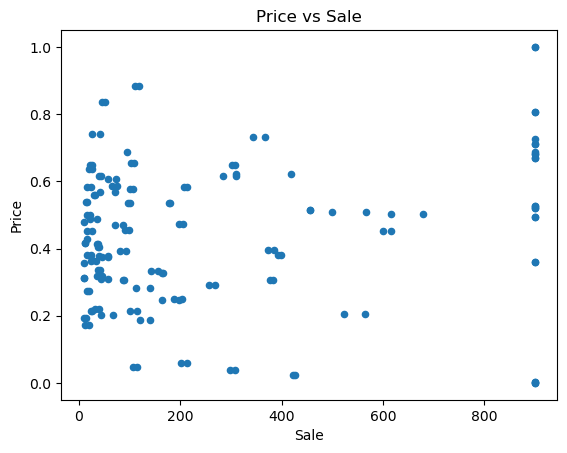

In [383]:
df.plot.scatter(x='Sale', y='Price', title='Price vs Sale')

# Homoscedasicity

<Axes: xlabel='fitted_value', ylabel='Residual'>

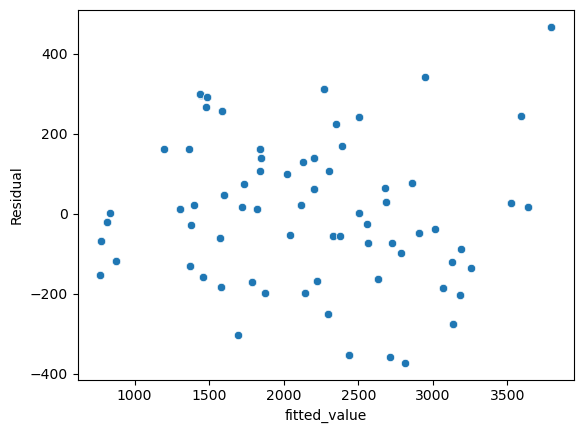

In [384]:
sns.scatterplot(x='fitted_value', y='Residual',data=train)

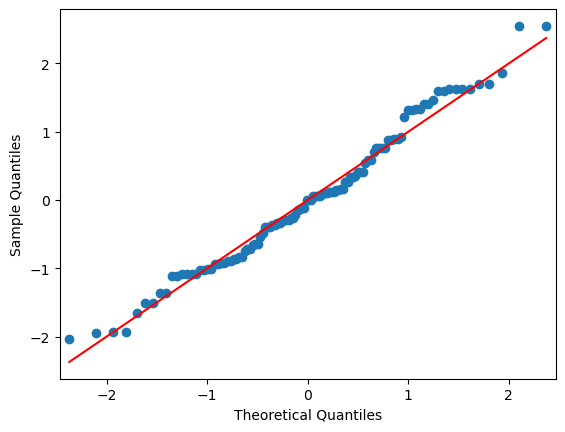

In [385]:
import statsmodels.api as sm
from matplotlib import pyplot as plt

fig = sm.qqplot(train['Residual'], fit=True, line='s') # s indicate standardized line
plt.show()

<Axes: ylabel='Frequency'>

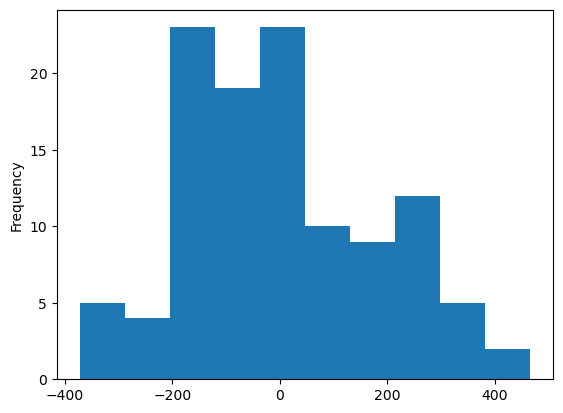

In [386]:
train['Residual'].plot.hist()

# Prediction on test

In [387]:
X_test = X_test.loc[:,['ppi', 'cpu core', 'internal memory', 'ram', 'thickness']]
X_test.head()

,ppi,cpu core,internal memory,ram,thickness
65,401.0,6,32.0,3.0,9.3
23,524.0,4,32.0,3.0,8.3
68,245.0,4,4.0,1.0,8.5
82,515.0,8,32.0,4.0,7.6
116,401.0,8,32.0,4.0,8.0


In [388]:
test = pd.concat([X_test,y_test], axis=1)
test.head()

,ppi,cpu core,internal memory,ram,thickness,Price
65,401.0,6,32.0,3.0,9.3,2824
23,524.0,4,32.0,3.0,8.3,2744
68,245.0,4,4.0,1.0,8.5,1734
82,515.0,8,32.0,4.0,7.6,3005
116,401.0,8,32.0,4.0,8.0,3287


In [389]:
import numpy as np
test['Prediction'] = np.round(Model3.predict(X_test),2)
test['Error / Residual'] = np.round(test.Price - test.Prediction,2)
test.head()

,ppi,cpu core,internal memory,ram,thickness,Price,Prediction,Error / Residual
65,401.0,6,32.0,3.0,9.3,2824,2550.05,273.95
23,524.0,4,32.0,3.0,8.3,2744,2680.87,63.13
68,245.0,4,4.0,1.0,8.5,1734,1717.46,16.54
82,515.0,8,32.0,4.0,7.6,3005,3125.69,-120.69
116,401.0,8,32.0,4.0,8.0,3287,2946.63,340.37


# Comparision

In [390]:
from sklearn.metrics import r2_score
r2 = r2_score(train.Price,train.fitted_value)
print('R-Squared score for model Performance on Train : ', np.round(r2,2)*100)

R-Squared score for model Performance on Train :  95.0


In [391]:
r2 = r2_score(test.Price,test.Prediction)
print('R-Squared score for model Performance on Test : ', np.round(r2,2)*100)

R-Squared score for model Performance on Test :  91.0


# Loss Function - RMSE

In [392]:
from sklearn.metrics import mean_squared_error 

model_mse = mean_squared_error(train['Price'],train['fitted_value'])
model_rmse = np.sqrt(model_mse)

print("RMSE of Train Data : ",np.round(model_rmse,2)) #21

RMSE of Train Data :  183.21


In [393]:
model_mse = mean_squared_error(test['Price'],test['Prediction'])
model_rmse = np.sqrt(model_mse)

print("RMSE of Test Data : ",np.round(model_rmse,2)) #21

RMSE of Test Data :  208.19
